##Linear Regression

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the salary dataset

In [2]:
sal_data=pd.read_csv('Salary_Data.csv')

Show the first 10 rows of the dataset

In [3]:
first_10=sal_data.head(10)
print(first_10)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


Show the dimensions (No. of rows and coulmns) of the dataset

In [4]:
dim=sal_data.shape
print(dim)

(30, 2)


Print all the column names of the dataset

In [5]:
sal_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Print general information of the dataset like column, and datatype.

In [6]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Extract independent and dependent features and store it in two different variables.

In [7]:
X = sal_data.drop(columns=['Salary'])

y=sal_data['Salary']

print("Independent Features(X)")
print(X)
print("\nDependent Features(y)")
print(y)

Independent Features(X)
    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5

Dependent Features(y)
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22 

Split the dataset into train and test set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

In [10]:
X_train.shape

(21, 1)

In [11]:
X_test.shape

(9, 1)

Training the Simple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor)

LinearRegression()


In [14]:
regressor.intercept_

26777.39134119764

In [15]:
regressor.coef_

array([9360.26128619])

Predict the Test set results

In [16]:
y_pred= regressor.predict(X_test)  
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

Visualize the linear regression on training data using scatterplot.

In [17]:
X_train_flat = np.ravel(X_train)

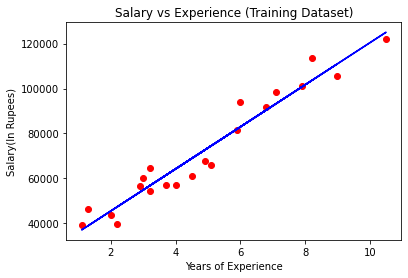

In [18]:

plt.scatter(X_train_flat, y_train, color='red') 
plt.plot(X_train_flat, regressor.predict(X_train), color = 'blue')
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()


Visualize the linear regression on test data using scatterplot.

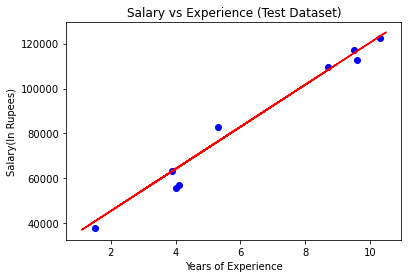

In [19]:
plt.scatter(X_test, y_test, color="blue")   
plt.plot(X_train_flat, regressor.predict(X_train), color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

Finding R^2 score

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2=r2_score(y_test, y_pred)
r2

0.9740993407213511

##Logistic Regression

Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Read the heart failure dataset

In [23]:
hd=pd.read_csv('heart.csv')

Display the first five rows


In [24]:
first_5=hd.head(5)
print(first_5)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Check for missing values

In [25]:
hd.isnull().any()

hd.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Describe numerical features

In [26]:
hd.describe(percentiles=None, include=None, exclude=None)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Visualize the distribution of key features (Age, Cholesterol, MaxHR) using histograms.

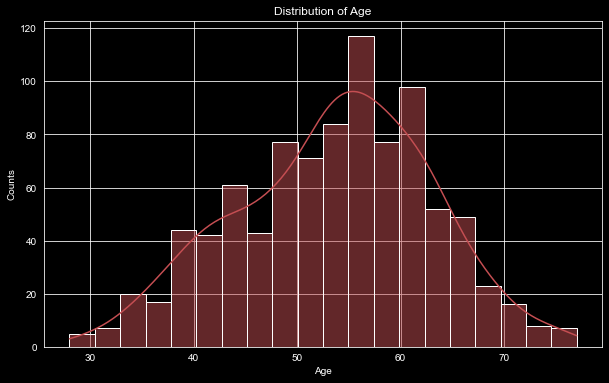

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.histplot(hd['Age'], kde=True, color='#c44e52', bins=20, ax=ax)

ax.set_xlabel('Age', color='white')
ax.set_ylabel('Counts', color='white')
ax.set_title('Distribution of Age', color='white')
ax.tick_params(axis='both', colors='white')

plt.show()
plt.close()

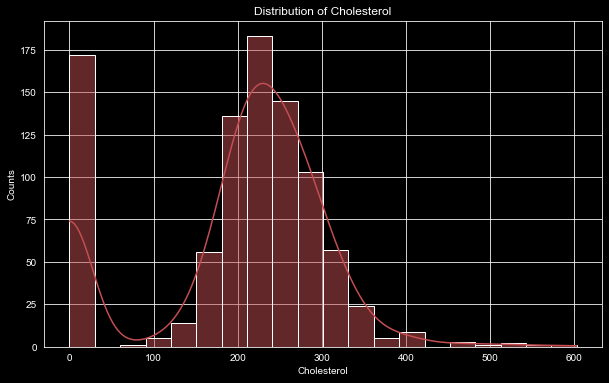

In [28]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.histplot(hd['Cholesterol'], kde=True, color='#c44e52', bins=20, ax=ax)

ax.set_xlabel('Cholesterol', color='white')
ax.set_ylabel('Counts', color='white')
ax.set_title('Distribution of Cholesterol', color='white')
ax.tick_params(axis='both', colors='white')

plt.show()
plt.close()

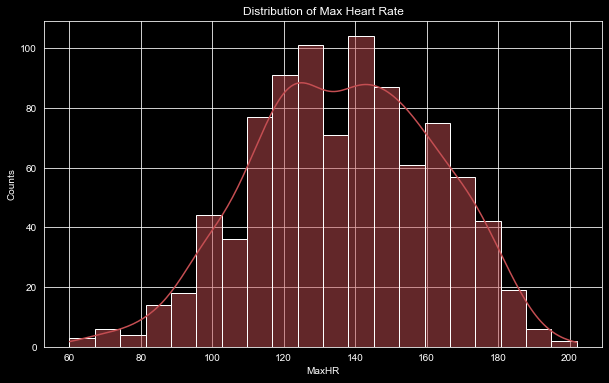

In [29]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.histplot(hd['MaxHR'], kde=True, color='#c44e52', bins=20, ax=ax)

ax.set_xlabel('MaxHR', color='white')
ax.set_ylabel('Counts', color='white')
ax.set_title('Distribution of Max Heart Rate', color='white')
ax.tick_params(axis='both', colors='white')

plt.show()

List all categorical_features

In [39]:
from sklearn.preprocessing import LabelEncoder

In [31]:
categorical_features = hd.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Convert categorical variables into numerical format using label encoding.

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in categorical_features:
    hd[col] = labelencoder.fit_transform(hd[col])

Analyze the correlation between features using a heatmap.

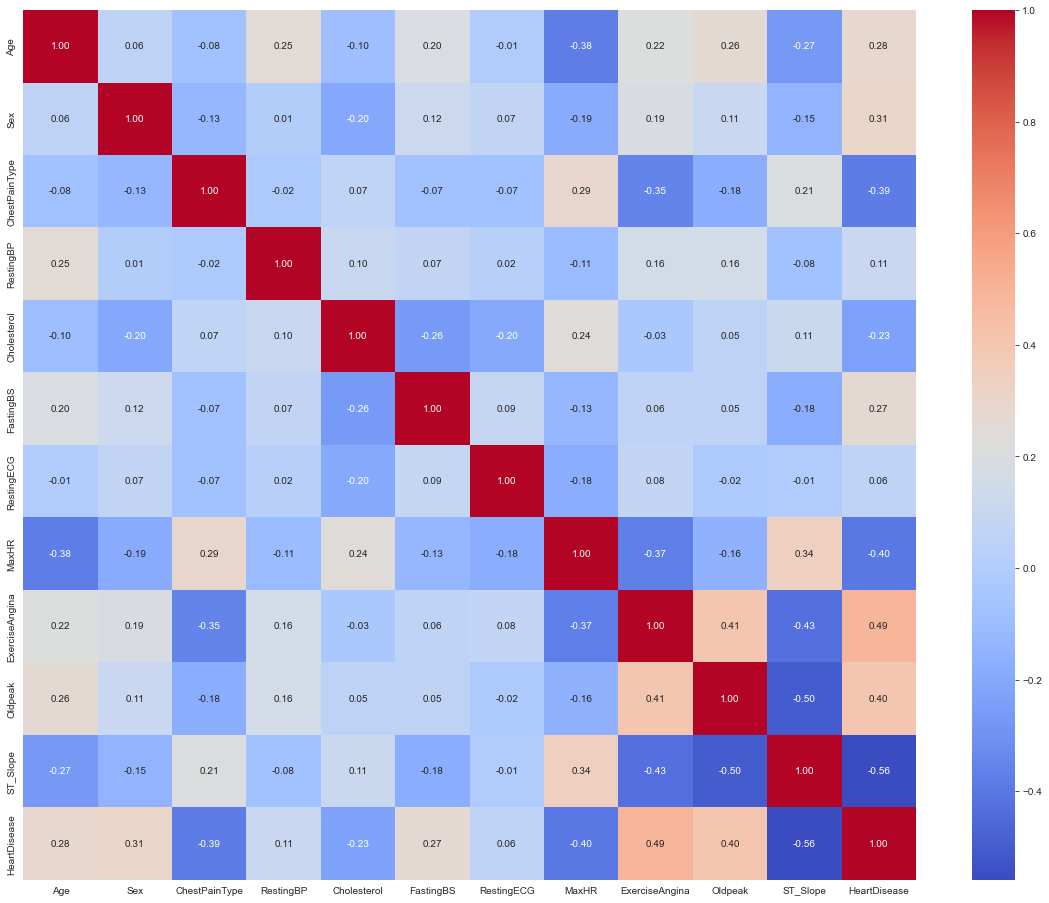

In [33]:

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(hd.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Split the dataset into training and testing sets (80-20 split).

In [40]:
X = hd.drop(['HeartDisease'],axis = 1)
y = hd['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

Perform hyperparameter tuning on logistic regression using GridSearchCV to find the best parameters

In [44]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)
print(grid.best_params_)
best_params = grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Train the logistic regression model using the best parameters obtained from GridSearchCV and evaluate its performance on the test set using accuracy, confusion matrix, and classification report.

In [45]:
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [47]:
y_pred = best_log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8369565217391305
Confusion Matrix:
 [[59 18]
 [12 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [48]:
from sklearn.metrics import roc_curve, auc

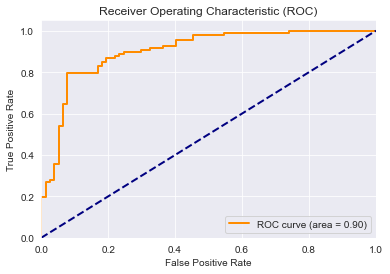

In [50]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()